# Challenge 1

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [22]:
bills=['handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze',
   'el-salvador-aid','religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras', 'mx-missile',
  'immigration','synfuels-corporation-cutback','education-spending','superfund-right-to-sue','crime','duty-free-exports',
       'export-administration-act-south-africa','party']

In [29]:
df=pd.read_csv('/Users/moshelaster/nyc16_ds8/challenges/challenges_data/house-votes-84.data',header=None,names=bills)

In [34]:
df=df.replace({'y':1,'n':0})

In [81]:
maj_vote=[]
for col in df:
    maj_vote.append(df[col].value_counts().idxmax())

In [93]:
for col,val in zip(df,maj_vote):
    df[col].replace(to_replace='?',value=val,inplace=True)

In [99]:
df=df.replace({'republican.':'republican','democrat.':'democrat'})

# Challenge 2

In [104]:
from sklearn.cross_validation import train_test_split

In [114]:
X=df[df.columns[:-1]]
y=df[df.columns[-1]]

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.30, random_state=4444)

# Challenge 3

In [121]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [147]:
k_value=[]
accuracy=[]
for i in range(1,21):
    k_value.append(i)
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))

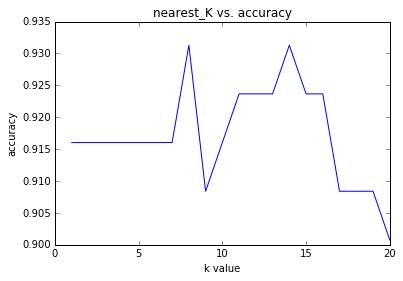

In [153]:
plt.title('nearest_K vs. accuracy')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.plot(k_value,accuracy)

In [157]:
max(zip(k_value,accuracy), key=lambda x: x[1])

(8, 0.93129770992366412)

K=8 gives the best value

# Challenge 4

In [159]:
from sklearn.linear_model import LogisticRegression

In [160]:
log_reg=LogisticRegression()

In [161]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [162]:
accuracy_score(y_test,log_reg.predict(X_test))

0.93893129770992367

Looks more accurate than KNN

# Challenge 5

In [174]:
y.value_counts()['democrat']

267

In [175]:
y.value_counts()['republican']

168

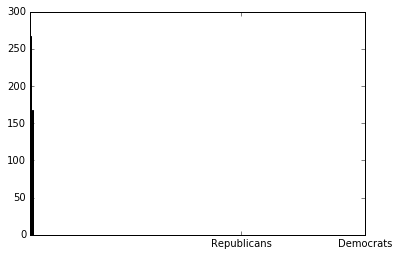

In [186]:
# Not sure why this is so ugly...will return
congressmen = [267, 168]

LABELS = ["Democrats","Republicans"]

plt.bar(np.arange(len(congressmen)), congressmen,align='center')
plt.xticks(congressmen, LABELS)
plt.show()

In [192]:
def make_dem(array):
    return np.array(['democrat']*len(array))
def make_rep(array):
    return np.array(['republican']*len(array))

In [194]:
print accuracy_score(y,make_dem(y))
print accuracy_score(y,make_rep(y))

0.613793103448
0.386206896552


# Challenge 6

In [195]:
k_value_2=[]
knn_accuracy_2=[]
log_reg_acc_2=[]
for i in range(1,len(y)):
    k_value_2.append(i)
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, y)
    knn_accuracy_2.append(accuracy_score(y,knn.predict(X)))
    log_reg=LogisticRegression()
    log_reg.fit(X,y)
    log_reg_acc_2.append(accuracy_score(y,log_reg.predict(X)))
    
    

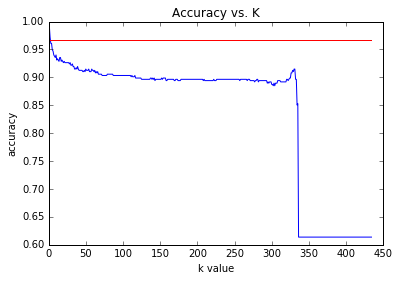

In [200]:
plt.title('Accuracy vs. K')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.plot(k_value_2,knn_accuracy_2,color='blue')
plt.plot(k_value_2,log_reg_acc_2,color='red')
plt.show()


# Challenge 7

In [202]:
from sklearn.learning_curve import learning_curve

In [206]:
log_reg=LogisticRegression()

In [212]:
train_size, train_score, test_score= learning_curve(log_reg,X,y)

In [213]:
train_size

array([ 29,  94, 159, 224, 290])

In [221]:
train_score

array([[ 1.        ,  0.96551724,  0.96551724],
       [ 0.9893617 ,  0.9787234 ,  0.9787234 ],
       [ 0.98113208,  0.97484277,  0.97484277],
       [ 0.97767857,  0.97321429,  0.96875   ],
       [ 0.96896552,  0.96551724,  0.97241379]])

In [222]:
test_score

array([[ 0.96551724,  0.92413793,  0.88965517],
       [ 0.97241379,  0.92413793,  0.88965517],
       [ 0.96551724,  0.94482759,  0.91724138],
       [ 0.97241379,  0.95862069,  0.93793103],
       [ 0.97931034,  0.95862069,  0.94482759]])

In [218]:
train_cv_err = np.mean(train_score, axis=1)
test_cv_err = np.mean(test_score, axis=1)

In [219]:
train_cv_err

array([ 0.97701149,  0.9822695 ,  0.9769392 ,  0.97321429,  0.96896552])

In [220]:
test_cv_err

array([ 0.92643678,  0.92873563,  0.94252874,  0.95632184,  0.96091954])

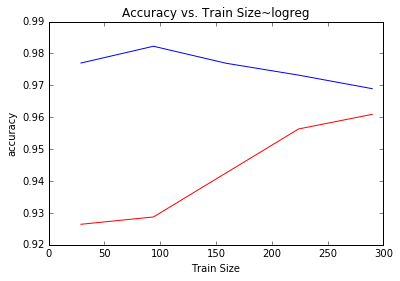

In [227]:
plt.title('Accuracy vs. Train Size~logreg')
plt.xlabel('Train Size')
plt.ylabel('accuracy')
plt.plot(train_size,train_cv_err,color='blue')
plt.plot(train_size,test_cv_err,color='red')
plt.show()

Repeat for KNN

In [224]:
knn_2=KNeighborsClassifier(n_neighbors=8)
train_size_knn, train_score_knn, test_score_knn= learning_curve(knn_2,X,y)

In [225]:
print train_size_knn
print train_score_knn
print test_score_knn

[ 29  94 159 224 290]
[[ 0.89655172  0.96551724  0.96551724]
 [ 0.91489362  0.94680851  0.94680851]
 [ 0.93081761  0.96226415  0.95597484]
 [ 0.92857143  0.95535714  0.94196429]
 [ 0.92413793  0.93448276  0.94482759]]
[[ 0.93103448  0.91724138  0.91724138]
 [ 0.94482759  0.91034483  0.90344828]
 [ 0.95172414  0.90344828  0.91034483]
 [ 0.95172414  0.90344828  0.92413793]
 [ 0.95172414  0.91034483  0.91034483]]


In [226]:
train_cv_err_knn = np.mean(train_score_knn, axis=1)
test_cv_err_knn = np.mean(test_score_knn, axis=1)

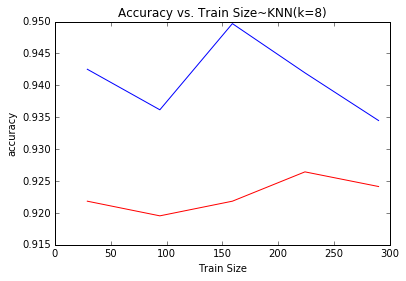

In [228]:
plt.title('Accuracy vs. Train Size~KNN(k=8)')
plt.xlabel('Train Size')
plt.ylabel('accuracy')
plt.plot(train_size_knn,train_cv_err_knn,color='blue')
plt.plot(train_size,test_cv_err_knn,color='red')
plt.show()

# Challenge 8

Gaussian

In [229]:
from sklearn.naive_bayes import GaussianNB

In [231]:
gauss=GaussianNB()

In [232]:
gauss.fit(X_train,y_train)

GaussianNB()

In [233]:
accuracy_score(y_test,gauss.predict(X_test))

0.93893129770992367

Support Vectors

In [234]:
from sklearn.svm import SVC

In [236]:
svc=SVC()
svc.fit(X_train,y_train)
accuracy_score(y_test,svc.predict(X_test))

0.95419847328244278

Decision Tree

In [237]:
from sklearn.tree import DecisionTreeClassifier

In [239]:
dec_tree=DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)
accuracy_score(y_test,dec_tree.predict(X_test))

0.93129770992366412

Random Forest

In [240]:
from sklearn.ensemble import RandomForestClassifier

In [241]:
rand_for=RandomForestClassifier()
rand_for.fit(X_train,y_train)
accuracy_score(y_test,rand_for.predict(X_test))

0.94656488549618323

# Challenge 9

In [242]:
from sklearn.cross_validation import cross_val_score

In [246]:
#initialize KNN with best value
knn_best=KNeighborsClassifier(n_neighbors=8)

In [248]:
#score for knn=8
cross_val_score(knn_best,X,y).mean()

0.92413793103448283

In [249]:
#score for logistic regression
cross_val_score(log_reg,X,y).mean()

0.96091954022988502

In [250]:
#score for Gaussian
cross_val_score(gauss,X,y).mean()

0.9264367816091954

In [251]:
# score for SVC
cross_val_score(svc,X,y).mean()

0.95632183908045976

In [252]:
#score for decision tree
cross_val_score(dec_tree,X,y).mean()

0.93333333333333324

In [253]:
#score for random forest
cross_val_score(rand_for,X,y).mean()

0.94942528735632192

# Challenge 10

In [262]:
#predict vote on Handicapped Infants bill
target=df['handicapped-infants']
pred=df[df.columns[1:-1]]

In [353]:
#unless there was some typo, I think the reason this score is so much lower 
#is because the voting pattern didn't split so neatly along party lines
log_reg_vote=LogisticRegression()
log_reg_vote.fit(pred,target)
cross_val_score(log_reg_vote,pred,target).mean()

0.67561451389982319

# Challenge 11

In [376]:
movies=pd.read_csv('/Users/moshelaster/nyc16_ds8/challenges/challenges_data/2013_movies.csv')
movies=movies[movies.Budget>0]

In [377]:
def runtime(r):
    if r > 100:
        return 1
    else:
        return 0

In [378]:
movies.Runtime=movies.Runtime.apply(runtime)

(array([ 28.,  61.]), array([ 0. ,  0.5,  1. ]), <a list of 2 Patch objects>)

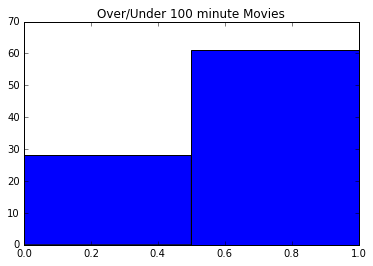

In [379]:
plt.title('Over/Under 100 minute Movies')

plt.hist(movies.Runtime,bins=2)

In [380]:
movies=pd.concat([movies,pd.get_dummies(movies.Rating)],axis=1)

In [382]:
y_mov=movies.Runtime
X_mov=movies[['Budget','DomesticTotalGross','PG','PG-13','R']]

In [384]:
X_movtrain, X_movtest, y_movtrain, y_movtest = train_test_split(X_mov, y_mov,test_size=.30, random_state=4444)

In [385]:
k_movvalue=[]
movaccuracy=[]
for i in range(1,50):
    k_movvalue.append(i)
    knnmov=KNeighborsClassifier(n_neighbors=i)
    knnmov.fit(X_movtrain, y_movtrain)
    movaccuracy.append(accuracy_score(y_movtest,knnmov.predict(X_movtest)))

In [388]:
max(zip(k_movvalue,movaccuracy), key=lambda x: x[1])

(23, 0.77777777777777779)

In [389]:
knnmov=KNeighborsClassifier(n_neighbors=23)

In [390]:
knnmov.fit(X_movtrain,y_movtrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=23, p=2,
           weights='uniform')

In [391]:
accuracy_score(y_movtest,knnmov.predict(X_movtest))

0.77777777777777779

Using Budget, Domestic Gross and Ratings as predictors and a KNN, k=23, produces the above acc score

In [392]:
log_regmov=LogisticRegression()
log_regmov.fit(X_movtrain,y_movtrain)
accuracy_score(y_movtest,log_regmov.predict(X_movtest))

0.7407407407407407

In [393]:
log_regmov.coef_

array([[  2.16564047e-09,   6.23869543e-09,  -4.08436759e-16,
          1.55096331e-16,   1.21394670e-16]])

Domestic Gross is the best predictor of longer runtime, while PG seems to correlate with shorter runtime (I guess kids just have shorter attention spans)

In [394]:
#contrast with baseline 'stupid predictor' is the same thing as fitting to a knn model, where k=len(values)
knnmov=KNeighborsClassifier(n_neighbors=len(movies))

In [395]:
knnmov.fit(X_movtrain,y_movtrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=89, p=2,
           weights='uniform')

In [396]:
accuracy_score(y_movtest,log_regmov.predict(X_movtest))

0.7407407407407407

# Challenge 12

In [303]:
info=['age','op_year','nodes','survive']

In [304]:
df2=pd.read_csv('/Users/moshelaster/nyc16_ds8/challenges/challenges_data/haberman.data',header=None,names=info)

In [306]:
#avg age and std
print df2.age.mean()
print df2.age.std()

52.4575163399
10.8034523493


In [310]:
#avg and std given lived >5 yrs
print df2[df2.survive==2].age.mean()
print df2[df2.survive==2].age.std()

53.6790123457
10.1671372083


In [311]:
#avg and std given lived <5
print df2[df2.survive==1].age.mean()
print df2[df2.survive==1].age.std()

52.0177777778
11.0121541799


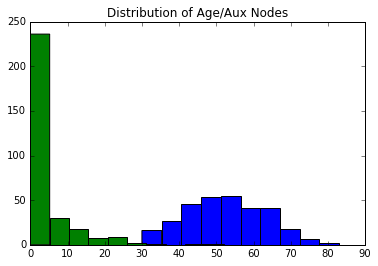

In [315]:
# add legend
plt.title('Distribution of Age/Aux Nodes')
plt.hist(df2.age,label)
plt.hist(df2.nodes)
plt.show()

In [323]:
#earliest year
'19'+str(df2.op_year.min())

'1958'

In [324]:
#most recent year
'19'+str(df2.op_year.max())

'1969'

In [329]:
df2.survive=df2.survive.apply(lambda x: x-1)

In [340]:
log_reg_2=LogisticRegression()

In [345]:
cross_val_score(log_reg_2,df2.iloc[:,:-1],df2.survive).mean()

0.75163398692810457

In [344]:
log_reg_2.fit(df2.iloc[:,:-1],df2.survive)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [349]:
log_reg_2.coef_

array([[ 0.01854689, -0.0345458 ,  0.08812314]])

It seems that the best predictor is number of auxiliary nodes, while the earlier year of operation the better

In [350]:
train_size_2, train_score_2, test_score_2= learning_curve(log_reg_2,df2.iloc[:,:-1],df2.survive)

In [351]:
train_cv_err_2 = np.mean(train_score_2, axis=1)
test_cv_err_2 = np.mean(test_score_2, axis=1)

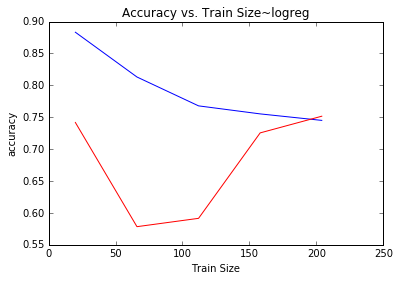

In [352]:
plt.title('Accuracy vs. Train Size~logreg')
plt.xlabel('Train Size')
plt.ylabel('accuracy')
plt.plot(train_size_2,train_cv_err_2,color='blue')
plt.plot(train_size_2,test_cv_err_2,color='red')
plt.show()